# Image Classification with CIFAR-10 Dataset using CNN

**Project Description**

 In this project, I implemented a deep learning-based image classification system that can classify images into predefined categories or classes. The goal was to achieve high accuracy in recognizing objects in images.



**Importing libraries**

In [1]:
# downloading packages
#! pip install numpy seaborn tensorflow matplotlib scikit-learn
# importing package
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Dataset Import and Preprocessing step**

In [2]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert TensorFlow tensors to NumPy arrays
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Resize images to a consistent size (e.g., 32x32 pixels)
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the NumPy arrays back to TensorFlow tensors
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Split the dataset into training, validation, and test sets using NumPy arrays
x_train, x_val, y_train, y_val = train_test_split(x_train.numpy(), y_train.numpy(), test_size=0.15, random_state=42)

# Convert the split data back to TensorFlow tensors
x_train = tf.convert_to_tensor(x_train)
x_val = tf.convert_to_tensor(x_val)
y_train = tf.convert_to_tensor(y_train)
y_val = tf.convert_to_tensor(y_val)


**Data Argumentation**

In [3]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1
)

# Fit the generator on your training data
datagen.fit(x_train)

 **Creating a CNN model**



In [4]:
# Create a CNN model
model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten the feature maps
    tf.keras.layers.Flatten(),

    # Fully Connected Layer 1
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training The model**

In [5]:
# Train the model (with data augmentation)
num_epochs = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_val, y_val),
                    epochs=num_epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 56s 82ms/step - loss: 2.2962 - accuracy: 0.0604 - val_loss: 2.3195 - val_accuracy: 0.9995
Epoch 2/20
665/665 [==============================] - 54s 81ms/step - loss: 2.2919 - accuracy: 0.0570 - val_loss: 2.3213 - val_accuracy: 0.9927
Epoch 3/20
665/665 [==============================] - 55s 82ms/step - loss: 2.2904 - accuracy: 0.0245 - val_loss: 2.3007 - val_accuracy: 0.9904
Epoch 4/20
665/665 [==============================] - 54s 81ms/step - loss: 2.2898 - accuracy: 0.0267 - val_loss: 2.3143 - val_accuracy: 0.9939
Epoch 5/20
665/665 [==============================] - 55s 83ms/step - loss: 2.2898 - accuracy: 0.0216 - val_loss: 2.3058 - val_accuracy: 0.9024
Epoch 6/20
665/665 [==============================] - 54s 81ms/step - loss: 2.2889 - accuracy: 0.0086 - val_loss: 2.3070 - val_accuracy: 0.9855
Epoch 7/20
665/665 [==============================] - 54s 81ms/step - loss: 2.2873 - accuracy: 0.0081 - val_loss: 2.3153 - val_accuracy:

**Plot training and validation accuracy**

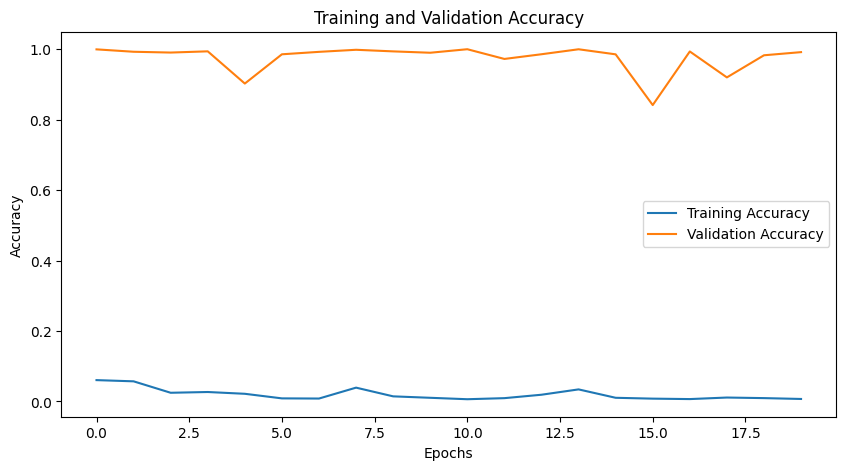

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

**Plot training and validation loss**

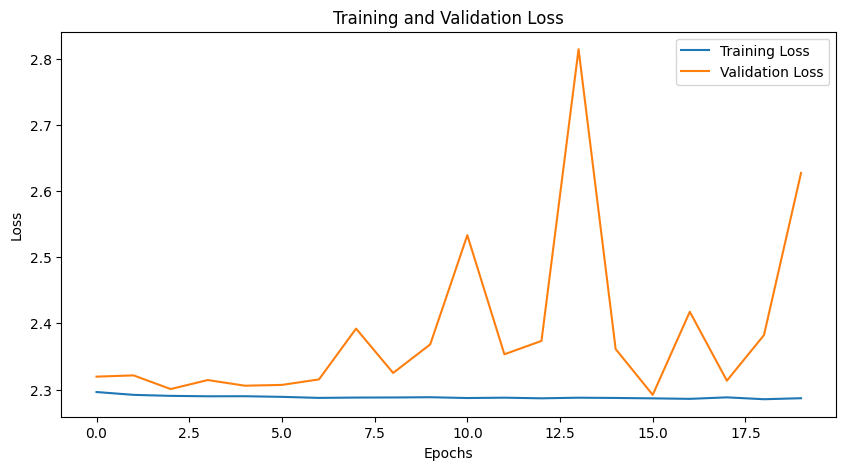

In [7]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

**Testing**

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 99.36%


In [9]:
# Generate predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 3s 10ms/step


**Confusion Matrix**

In [10]:
# Create a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

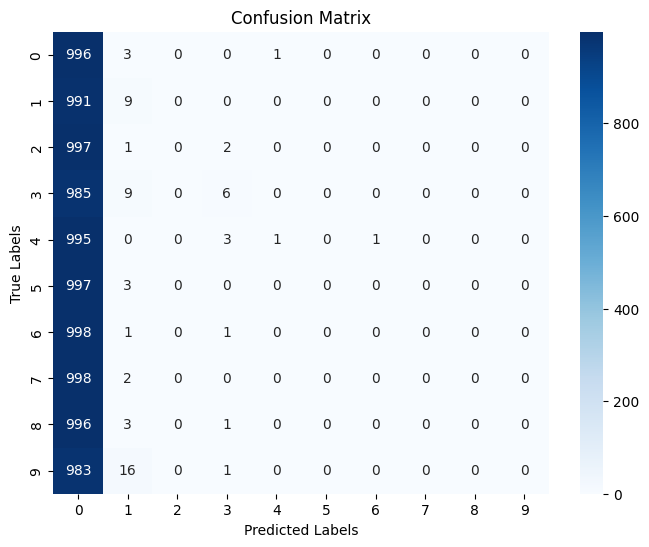

In [11]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Classification report**

In [12]:
# Generate a classification report
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classification_rep = classification_report(y_test, y_pred_classes, target_names=class_labels, zero_division=0)
print(classification_rep)

              precision    recall  f1-score   support

    airplane       0.10      1.00      0.18      1000
  automobile       0.19      0.01      0.02      1000
        bird       0.00      0.00      0.00      1000
         cat       0.43      0.01      0.01      1000
        deer       0.50      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.12      0.10      0.02     10000
weighted avg       0.12      0.10      0.02     10000





---

